In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tensorflow.keras import *
from keras.models import*
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from keras.utils import custom_object_scope
from keras.layers import *

c:\ProgramData\New folder\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#read data
data = pd.read_csv("E:/deep leering/tsla.us(2).txt")
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [3]:
data.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1858 non-null   object 
 1   Open     1858 non-null   float64
 2   High     1858 non-null   float64
 3   Low      1858 non-null   float64
 4   Close    1858 non-null   float64
 5   Volume   1858 non-null   int64  
 6   OpenInt  1858 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 101.7+ KB


In [5]:
# spliting data
train_size = int(len(data)*.8)
data_len = len(data)
data_len

1858

In [6]:
train = data[0:train_size]
len(train)

1486

In [7]:
test = data[train_size: ]
len(test)

372

In [8]:
scaler = MinMaxScaler()
train = train.loc[:,['Open']].values


In [9]:
train


array([[ 17.  ],
       [ 19.  ],
       [ 25.79],
       ...,
       [213.62],
       [216.99],
       [219.87]])

In [10]:
data_scaler = scaler.fit_transform(train)
data_scaler

array([[0.00316724],
       [0.01053291],
       [0.03553935],
       ...,
       [0.72728612],
       [0.73969727],
       [0.75030383]])

In [11]:
len_data = len(data_scaler)
len_data

1486

In [12]:
x_train = []
y_train = []
time_steps = 40

for i in range(time_steps, len_data):
    x_train.append(data_scaler[i - time_steps:i, 0])
    y_train.append(data_scaler[i , 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [14]:
model = Sequential()
model.add(SimpleRNN(units = 50, activation = 'tanh', input_shape = (x_train.shape[1],1), return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50, activation = 'tanh', return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50, activation = 'tanh',  return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [16]:
model.fit(x_train, y_train, epochs=20, batch_size=20)

Epoch 1/20
73/73 [==============================] - 4s 20ms/step - loss: 0.3508
Epoch 2/20
73/73 [==============================] - 1s 19ms/step - loss: 0.1989
Epoch 3/20
73/73 [==============================] - 1s 19ms/step - loss: 0.1205
Epoch 4/20
73/73 [==============================] - 1s 19ms/step - loss: 0.0791
Epoch 5/20
73/73 [==============================] - 1s 19ms/step - loss: 0.0504
Epoch 6/20
73/73 [==============================] - 1s 19ms/step - loss: 0.0425
Epoch 7/20
73/73 [==============================] - 1s 19ms/step - loss: 0.0343
Epoch 8/20
73/73 [==============================] - 1s 19ms/step - loss: 0.0303
Epoch 9/20
73/73 [==============================] - 1s 19ms/step - loss: 0.0263
Epoch 10/20
73/73 [==============================] - 1s 19ms/step - loss: 0.0239
Epoch 11/20
73/73 [==============================] - 1s 19ms/step - loss: 0.0222
Epoch 12/20
73/73 [==============================] - 1s 19ms/step - loss: 0.0187
Epoch 13/20
73/73 [==================

In [17]:
test_array = test.loc[:,['Open']].values

In [18]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


In [19]:
total_dataset = pd.concat((data['Open'], test['Open']), axis=0)
total_dataset.head()

0    17.00
1    19.00
2    25.79
3    25.00
4    23.00
Name: Open, dtype: float64

In [20]:

input = total_dataset[len(total_dataset)- len(test)- time_steps: ].values.reshape(-1, 1)
input = scaler.transform(input)
input

array([[1.3409568 ],
       [1.34003609],
       [1.31425625],
       [1.32125364],
       [1.290281  ],
       [1.24115199],
       [1.2329761 ],
       [1.22918278],
       [1.19228078],
       [1.19957279],
       [1.20200346],
       [1.1776231 ],
       [1.23415461],
       [1.25164807],
       [1.24096785],
       [1.22826207],
       [1.21776599],
       [1.24387729],
       [1.24041542],
       [1.25525725],
       [1.24339852],
       [1.23290244],
       [1.25153758],
       [1.25002762],
       [1.23945789],
       [1.22910912],
       [1.18830332],
       [1.18056937],
       [1.14771848],
       [1.11814532],
       [1.11604611],
       [1.11991309],
       [1.16418075],
       [1.04588812],
       [1.04356793],
       [1.07118919],
       [1.04916584],
       [1.06566494],
       [1.05461643],
       [1.05461643],
       [0.73826097],
       [0.74308548],
       [0.75262402],
       [0.76915995],
       [0.76197842],
       [0.7562332 ],
       [0.74927264],
       [0.750

In [21]:
len(test)


372

In [22]:
input.shape

(412, 1)

In [23]:
x_test=[]
for i in range (time_steps, 412):
    x_test.append(input[i-time_steps: i, 0])
x_test = np.array(x_test)

In [24]:
x_test.shape

(372, 40)

In [25]:
#x_test = np.reshape(test, (test.shape[0], test.shape[1], 1))

In [26]:
y_pred = model.predict(x_test)

12/12 [==============================] - 1s 9ms/step


In [27]:
y_pred = scaler.inverse_transform(y_pred)

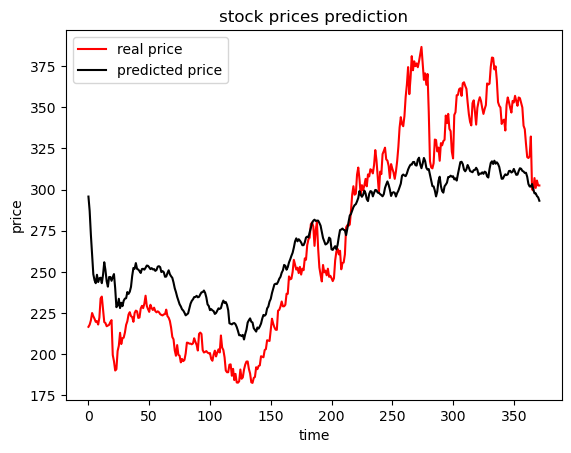

In [28]:
plt.plot(test_array, color = 'red', label ='real price')
plt.plot(y_pred, color = 'black', label ='predicted price')
plt.title("stock prices prediction")
plt.xlabel("time")
plt.ylabel('price')
plt.legend()
plt.show()

In [29]:
## LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation = 'tanh', return_sequences = True, input_shape = (x_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50, return_sequences = True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50, return_sequences = True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(1))

In [30]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


In [31]:
lstm_model.fit(x_train, y_train, epochs=50)

Epoch 1/50
46/46 [==============================] - 8s 47ms/step - loss: 0.0276
Epoch 2/50
46/46 [==============================] - 2s 45ms/step - loss: 0.0066
Epoch 3/50
46/46 [==============================] - 2s 45ms/step - loss: 0.0061
Epoch 4/50
46/46 [==============================] - 2s 45ms/step - loss: 0.0063
Epoch 5/50
46/46 [==============================] - 2s 45ms/step - loss: 0.0054
Epoch 6/50
46/46 [==============================] - 2s 45ms/step - loss: 0.0049
Epoch 7/50
46/46 [==============================] - 2s 46ms/step - loss: 0.0046
Epoch 8/50
46/46 [==============================] - 2s 47ms/step - loss: 0.0042
Epoch 9/50
46/46 [==============================] - 2s 49ms/step - loss: 0.0047
Epoch 10/50
46/46 [==============================] - 2s 52ms/step - loss: 0.0042
Epoch 11/50
46/46 [==============================] - 2s 47ms/step - loss: 0.0036
Epoch 12/50
46/46 [==============================] - 2s 50ms/step - loss: 0.0042
Epoch 13/50
46/46 [==================

In [32]:
y_pred_lstm = lstm_model.predict(x_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

12/12 [==============================] - 2s 21ms/step


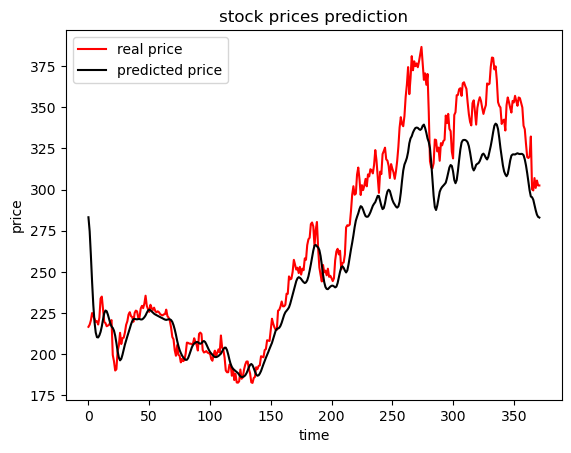

In [33]:
plt.plot(test_array, color = 'red', label ='real price')
plt.plot(y_pred_lstm, color = 'black', label ='predicted price')
plt.title("stock prices prediction")
plt.xlabel("time")
plt.ylabel('price')
plt.legend()
plt.show()

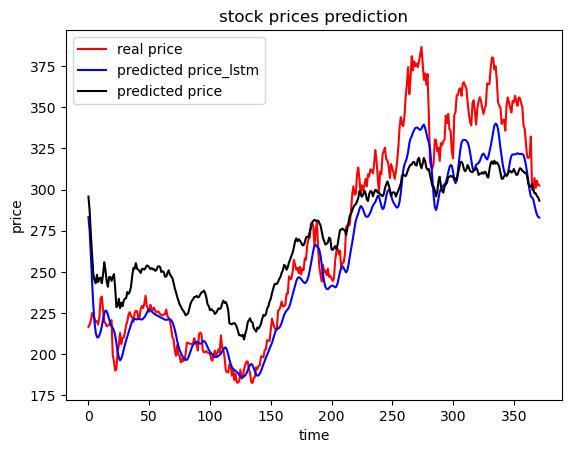

In [34]:
plt.plot(test_array, color = 'red', label ='real price')
plt.plot(y_pred_lstm, color = 'blue', label ='predicted price_lstm')
plt.plot(y_pred, color = 'black', label ='predicted price')
plt.title("stock prices prediction")
plt.xlabel("time")
plt.ylabel('price')
plt.legend()
plt.show()

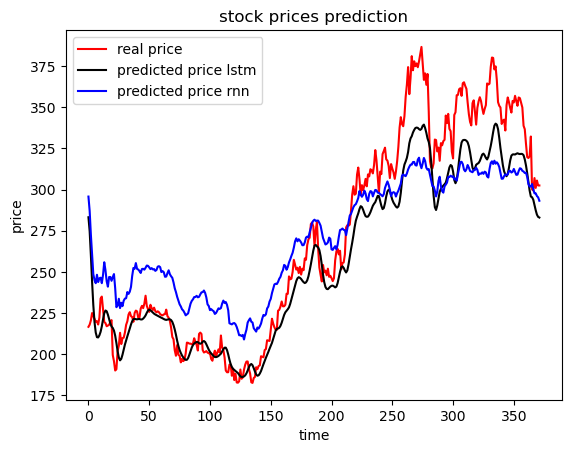

In [35]:
plt.plot(test_array, color = 'red', label ='real price')
plt.plot(y_pred_lstm, color = 'black', label ='predicted price lstm')
plt.plot(y_pred, color = 'blue', label ='predicted price rnn')

plt.title("stock prices prediction")
plt.xlabel("time")
plt.ylabel('price')
plt.legend()
plt.show()